# 물질의 특성을 알기 위한 ARPES data 이해하기

##### 들어가기 앞서 ARPES는 광전효과를 기반으로 합니다. 

---------------------------------------

#### 광전효과

###### 광전효과 : 금속 등의 물질이 한계 진동수(문턱 진동수)보다 큰 진동수를 가진 (따라서 높은 에너지를 가진) 전자기파를 흡수했을 때 전자를 내보내는 현상이다. 이 때 방출되는 전자를 **광전자**라 하는데, 보통 전자와 성질이 다르지는 않지만 빛에 의해 방출되는 전자이기 때문에 붙여진 이름이다.
<p align="center"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a6/Photoelectric_effect_in_a_solid_-_diagram.svg/413px-Photoelectric_effect_in_a_solid_-_diagram.svg.png" width="20%" height="20%"></p>   

###### [이미지 출처: https://ko.wikipedia.org/wiki/광전효과]

---------------------------------------

## ARPES

#### ARPES : 물질의 밴드구조를 직접적으로 관측하는 장비
(angle resolved photoemission spectroscopy - 각도 분해 광전자 분광법)
<p align="center"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/ARPES_analyzer_cross_section.svg/300px-ARPES_analyzer_cross_section.svg.png" width="40%" height="40%"></p>

###### [이미지 출처:https://fr.wikipedia.org/wiki/Spectroscopie_photo%C3%A9lectronique_r%C3%A9solue_en_angle]
#### -간단설명-
#### 1) 전자는 ARPES를 사용하여 감지된 각 전자의 운동 에너지 $E_k$과 방출 각도 $(θ, φ)$를 기록합니다. 
#### 2) $E_k$와 $(θ, φ)$를 가지고 운동학적 특성을 이용하여 전자가 물질로부터 방출되기 전에 가지고 있던 결합 에너지 $E_B$와 결정운동량 $ħk$를 추정할 수 있습니다.
#### 3) 바로 $E_B$와  $ħk$를 가지고 조합하여 만든 밴드 구조를 통해 고체의 성질(정보)을 알 수 있습니다.<br>
<br>
<br>

---------------------------------------


다음은 ARPES 실험 데이터를 가져와 분석해는 코드입니다.
=============

# 모듈 가져오기

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# CSV 파일 읽고 전치

In [51]:
data = np.genfromtxt('Cut280K_rNx.csv', delimiter=',')
matrix = np.transpose(data)

# 로우데이터 시각화

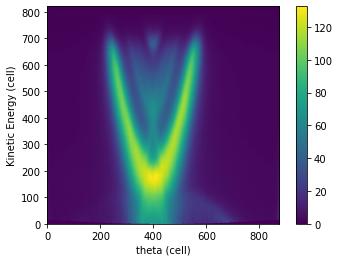

In [52]:
matrix = np.transpose(data)
plt.imshow(matrix,origin='lower')
plt.xlabel('theta (cell)')
plt.ylabel('Kinetic Energy (cell)')
plt.colorbar() #옆에 컬러바

# 상수 정의

In [53]:
h = 6.626e-34 # Planck constant
m = 9.109e-31 # electron mass
hv = 29 # 빛의 에너지 (eV)
wf = 4.43 # 일함수 (eV)

# matrix 행(x축), 열(y축) 정보

In [62]:
delta_ke = 0.001 # kinetic Energy(eV)의 delta값
start_ke = 23.885 #kinetic Energy(eV)의 시작값
ke_unit = 'eV'
delta_theta = 0.0410959 # 각도(Θ)의 delta값
start_theta = -17.9795 # 각도(Θ)의 시작값
theta_unit = 'slit deg'

# Binding Energy(eV) 계산



##### $$
E_k = hν − φ − E_B 
이므로
$$

## $$
E_B = hν − φ − E_k
$$

###### • $hν$ : 빛 에너지
###### • $φ$ : 샘플 표면 작용함수(surface work function) 즉, 일함수
###### • $E_k$ : 광전자 운동 에너지
###### • $E_B$ : 전자가 방출되기 전에 가지고 있던 결합 에너지

In [55]:
kinetic_energy = np.linspace(start_ke, start_ke + delta_ke * matrix.shape[0], matrix.shape[0])
binding_energy = hv - wf - kinetic_energy

# K 계산

##### $$
ħk_{||} = \sqrt {2mE_k}sin{θ}  이므로
$$

## $$
k_{||} = \frac{\sqrt {2mE_k}}{ħ}sin{θ} 
$$

###### • $ħk_{||}$ : 표면 평면에 대한 결정운동량
###### • 결정 구조의 이산 평면 주기성 때문에, 광전자방출 과정 전체에서 $k_{||}$는 보존됩니다(평면 상호 격자 벡터 $G_{||}$를 기준으로).
###### • 수직 구성 성분 $k_⊥$는 표면을 통과하는 동안 보존되지 않지만, 일부 가정하에서 추정할 수 있습니다

In [56]:
theta = np.linspace(start_theta, start_theta + delta_theta * matrix.shape[1], matrix.shape[1])
K = np.zeros((matrix.shape[0], matrix.shape[1]))
for i in range(matrix.shape[0]):
    K[i, :] = ((2 * m * kinetic_energy[i])** 0.5 / h) * np.sin(np.radians(theta))

# kinetic_energy와 theta 그래프 그리기

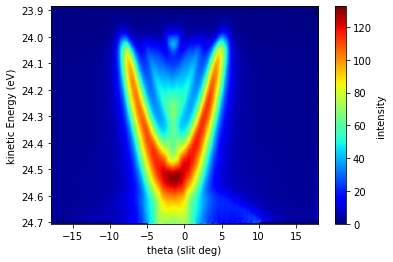

In [57]:
fig, ax = plt.subplots()
im = ax.imshow(matrix, extent=[theta.min(), theta.max(), kinetic_energy.max(), kinetic_energy.min()], aspect='auto', cmap='jet',origin='lower',interpolation='nearest')
ax.set_xlabel('theta ({0})'.format(theta_unit))
ax.set_ylabel('kinetic Energy ({0})'.format(ke_unit))
cbar = fig.colorbar(im)
cbar.set_label('intensity')

# binding_energy와 K 그래프 그리기

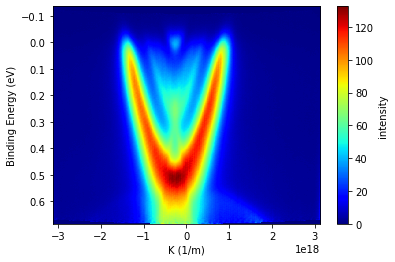

In [58]:
fig, ax = plt.subplots()
im = ax.imshow(matrix, extent=[K.min(), K.max(), binding_energy.max(), binding_energy.min()], aspect='auto', cmap='jet',origin='lower',interpolation='nearest')
ax.set_xlabel('K (1/m)')
ax.set_ylabel('Binding Energy ({0})'.format(ke_unit))
cbar = fig.colorbar(im)
cbar.set_label('intensity')
plt.show()

# CSV 파일로 저장

In [60]:
df = pd.DataFrame(matrix, columns=theta, index=binding_energy)
df.index.name = 'Binding Energy ({0})'.format(ke_unit)
df.columns.name = 'theta ({0})'.format(theta_unit)
df.to_csv('matrix.csv')
